# MobileNet

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,History
#from sklearn.metrics import confusion_matrix
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import itertools
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#import matplotlib.pyplot as plt
#%matplotlib inline

In [0]:
#@title
keras.__version__

'2.2.4'

In [0]:
import os
os.chdir("/home/pi/Desktop")
!pwd

/home/pi/Desktop


# Predictions

In [0]:
model = keras.models.load_model('/home/pi/Desktop/raks_model14.h5')

In [0]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

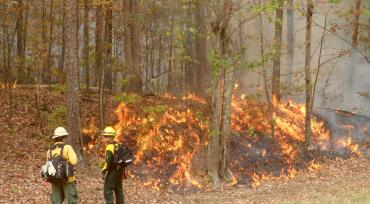

In [0]:
from IPython.display import Image
Image(filename='14.jpg', width=300,height=200) 

In [0]:
preprocessed_image = prepare_image('14.jpg')
predictions = model.predict(preprocessed_image)
print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
labels=(predictions>0.5).astype(np.int)
#print(labels)
if labels[0][0]==1 :
    print("Fire detected")
else:
    print("No Fire detected")

#results = imagenet_utils.decode_predictions(predictions)
#results

Fire : 99.7%  |Not Fire: 0.25%
Fire detected
